<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

<center><h2>Term 4 : Machine Learning Project - Store item sales demand forecast</h2></center><br>
<center><h3>TIME SERIES ANALYSIS - ARIMA model </h3></center>

* <B>Created by : Sudeep Raj</B>

## Table of contents
1. Objective
2. Data Loading and Visualization
3. Stationarity Check
4. Decomposition
5. Data Transformation to achieve Stationarity
6. Plotting ACF & PACF
7. Building ARIMA Model
8. Conclusion

## 1. Objective
* Build a model to forecast the sales in store.
* The data is classified in date/time and the store, item and sales.

## 2. Data Loading and Visualization

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline   
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode()

In [2]:
df  =  pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Store_Item_demand_forecast.csv')
df.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [3]:
df.shape

(913000, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
date     913000 non-null object
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [5]:
df.describe()

store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000

In [6]:
df['day']=pd.DatetimeIndex(df['date']).day
df['weekday']=pd.DatetimeIndex(df['date']).weekday
df['month']=pd.DatetimeIndex(df['date']).month 
df['year']=pd.DatetimeIndex(df['date']).year

In [7]:
df.head()

date  store  item  sales  day  weekday  month  year
0  2013-01-01      1     1     13    1        1      1  2013
1  2013-01-02      1     1     11    2        2      1  2013
2  2013-01-03      1     1     14    3        3      1  2013
3  2013-01-04      1     1     13    4        4      1  2013
4  2013-01-05      1     1     10    5        5      1  2013

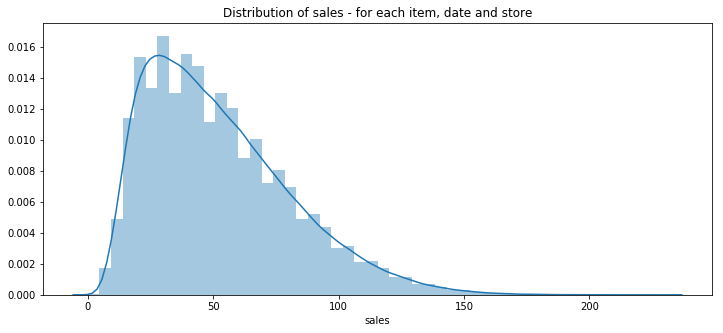

In [8]:
plt.figure(figsize=(12,5))
plt.title("Distribution of sales - for each item, date and store")
ax = sns.distplot(df['sales'])

In [9]:
year_df = df.groupby(df.year)['sales'].sum().to_frame()

trace = go.Bar(
    y= year_df.sales, x= ['2013','2014','2015','2016','2017'],
    marker=dict(color='rgba(179, 143, 0, 0.6)', line=dict(color='rgba(179, 143, 0, 1.0)', width=1)),
    name='Total sales by year', orientation='v'
)

layout = go.Layout(autosize=False, title= 'Total sales by year', showlegend=True, width=600, height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Sales of the product is slowly increasing, clearly it is a  seasonality effect. 

In [10]:
monthly_df = df.groupby([df.year, df.month])['sales'].mean()
monthly_df.index = monthly_df.index.set_names(['year', 'month'])
monthly_df = monthly_df.reset_index()
x_axis = []
for y in range(13, 18):
    for m in range(1,12):
        x_axis.append("{}/{}".format(m,y))
trace = go.Scatter(x= x_axis, y= monthly_df.sales, mode= 'lines+markers', name= 'sales avg per month', line=dict(width=3))
layout = go.Layout(autosize=True, title= 'Sales - average per month', showlegend=True)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Monthly average sales of product,clearly it is a time series problem.

In [11]:
monthly_df = df.groupby([df.year, df.month, 'store']).mean()
monthly_df.index = monthly_df.index.set_names(['year', 'month', 'store'])
monthly_df = monthly_df.reset_index()

traces = []
for i in range(1, 11):
    store_sales = monthly_df[monthly_df.store == i]
    trace = go.Scatter(x= x_axis, y= store_sales.sales, mode= 'lines+markers', name= 'Store '+str(i), line=dict(width=3))
    traces.append(trace)
layout = go.Layout(autosize=True, title= 'Sales - average per month', showlegend=True)
fig = go.Figure(traces, layout=layout)
iplot(fig)

Average sales per month of different stores, graph clearly shows the timeseries issue with increasing average.

In [12]:
store_total = df.groupby(['store'])['sales'].sum().to_frame().reset_index()
store_total.sort_values(by = ['sales'], ascending=True, inplace=True)
labels = ['Store {}'.format(i) for i in store_total.store]

trace = go.Bar(
    y= store_total.sales, x= labels,
    marker=dict(color='rgba(179, 143, 0, 0.6)', line=dict(color='rgba(179, 143, 0, 1.0)', width=1)),
    name='Total sales per store', orientation='v'
)

layout = go.Layout(autosize=True, title= 'Total sales by store')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Graph clearly shows that Store2 have the highest sales generating a revenue of around 6 millions whereas Store7 being the least generating a revenue of around 3 millions.

In [13]:
df_store_item1 = df.loc[(df['store'] == 1) & (df['item'] == 1)]
df_store_item1.head()

date  store  item  sales  day  weekday  month  year
0  2013-01-01      1     1     13    1        1      1  2013
1  2013-01-02      1     1     11    2        2      1  2013
2  2013-01-03      1     1     14    3        3      1  2013
3  2013-01-04      1     1     13    4        4      1  2013
4  2013-01-05      1     1     10    5        5      1  2013

In [14]:
df_store_item1.shape

(1826, 8)

In [15]:
df_store_item1['date']  =  pd.to_datetime(df_store_item1['date'],infer_datetime_format = True)             

indexDataset = df_store_item1.set_index(['date'])
indexDataset = indexDataset.drop(columns=["store","item","day","weekday","month","year"])
indexDataset.head()

sales
date             
2013-01-01     13
2013-01-02     11
2013-01-03     14
2013-01-04     13
2013-01-05     10

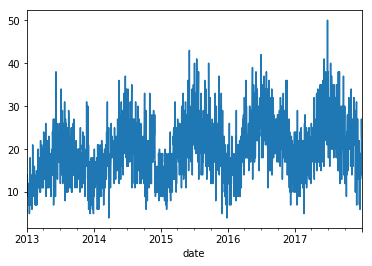

In [16]:
indexDataset['sales'].plot()

## 3. Stationarity Check

In [17]:
def rolling_means(timeSeries_column_name):
    rolmean  =  timeSeries_column_name.rolling(window = 12).mean()    #window size 12 denotes 12 months, giving rolling mean at yearly level
    rolstd  =  timeSeries_column_name.rolling(window = 12).std()

    #Plot rolling statistics
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize']  =  10, 5 

    timeSeries_column_name.plot( color = 'blue', label = 'Original')
    rolmean.plot(color = 'red', label = 'Rolling Mean')
    std  =  rolstd.plot(color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

In [18]:
#Perform Augmented Dickey–Fuller test:
def adf_test(timeSeries_column_name):
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(timeSeries_column_name, autolag = 'AIC')

    dfoutput  =  pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:')    
    print(dfoutput)

In [19]:
def test_stationarity(timeSeries_columnName):
    rolling_means(timeSeries_columnName)
    adf_test(timeSeries_columnName)

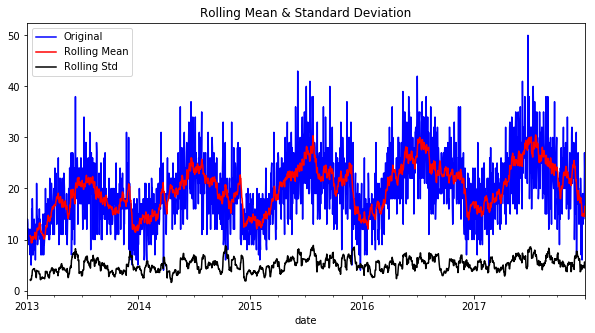

Results of Dickey Fuller Test:
Test Statistic                   -3.157671
p-value                           0.022569
#Lags Used                       23.000000
Number of Observations Used    1802.000000
Critical Value (1%)              -3.433984
Critical Value (5%)              -2.863145
Critical Value (10%)             -2.567625
dtype: float64


In [20]:
test_stationarity(indexDataset["sales"])

## 4. Decomposition

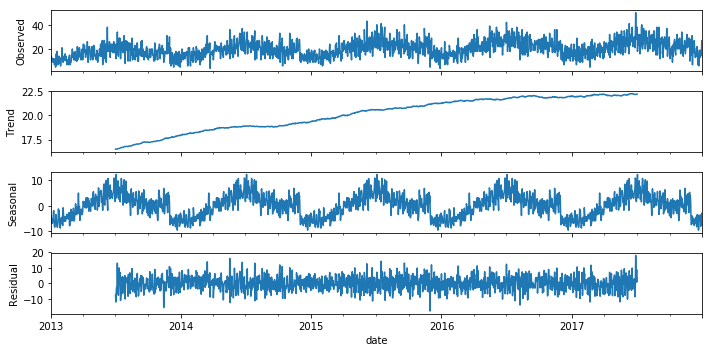

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
figure = seasonal_decompose(indexDataset["sales"], model='additive', freq=365).plot()

## 5. Data Transformation to achieve Stationarity

sales  salesModLog
date                          
2013-01-01     13     2.564949
2013-01-02     11     2.397895
2013-01-03     14     2.639057
2013-01-04     13     2.564949
2013-01-05     10     2.302585

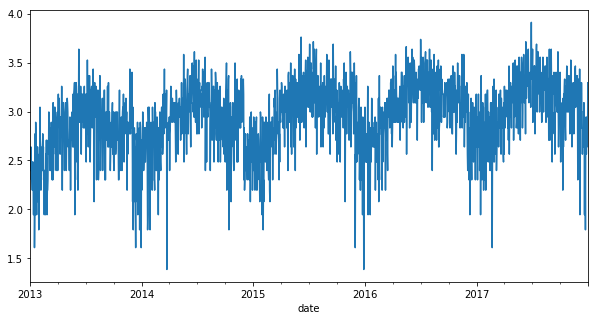

In [22]:
def generate():
    indexDataset['salesModLog'] = np.log(indexDataset.sales)
    indexDataset.salesModLog.plot()
    return indexDataset
indexDataset = generate()
indexDataset.head()

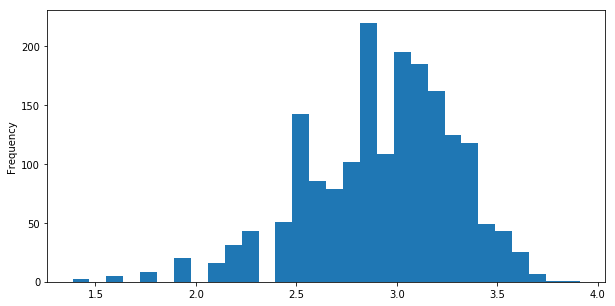

In [23]:
indexDataset.salesModLog.plot(kind = "hist", bins = 30)

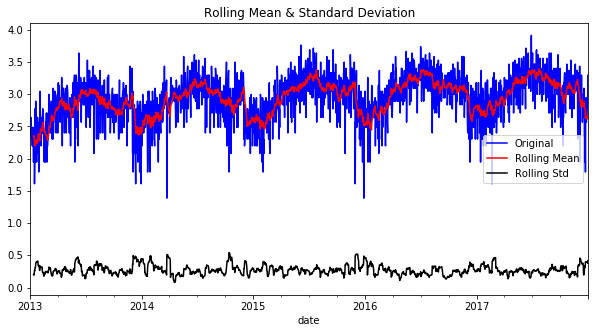

Results of Dickey Fuller Test:
Test Statistic                   -3.594424
p-value                           0.005869
#Lags Used                       23.000000
Number of Observations Used    1802.000000
Critical Value (1%)              -3.433984
Critical Value (5%)              -2.863145
Critical Value (10%)             -2.567625
dtype: float64


In [24]:
def generate():
    test_stationarity(indexDataset.salesModLog)
    return None
generate()

sales  salesModLog  salesModLog1
date                                        
2013-01-02     11     2.397895      2.564949
2013-01-03     14     2.639057      2.397895
2013-01-04     13     2.564949      2.639057
2013-01-05     10     2.302585      2.564949
2013-01-06     12     2.484907      2.302585

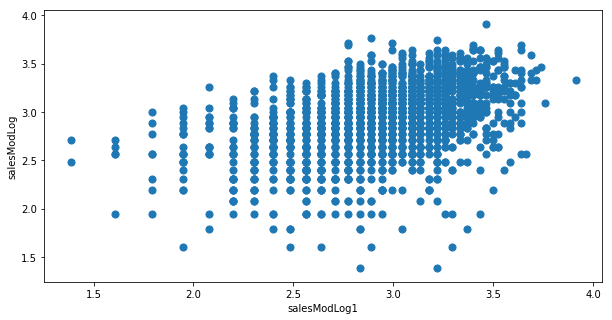

In [25]:
def generate():
    indexDataset["salesModLog1"] = indexDataset.salesModLog.shift()
    indexDataset.plot(kind= "scatter", y = "salesModLog", x = "salesModLog1", s = 50)
    return indexDataset[indexDataset.salesModLog1.isnull()== False]
indexDataset = generate()
indexDataset.head()

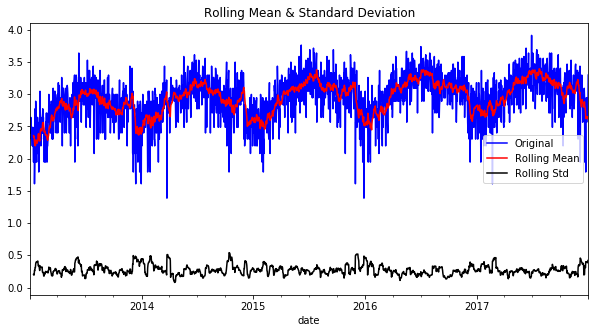

Results of Dickey Fuller Test:
Test Statistic                   -3.584652
p-value                           0.006061
#Lags Used                       23.000000
Number of Observations Used    1801.000000
Critical Value (1%)              -3.433986
Critical Value (5%)              -2.863146
Critical Value (10%)             -2.567625
dtype: float64


In [26]:
def generate():
    test_stationarity(indexDataset.salesModLog1)
    return None
generate()

sales  salesModLog  salesModLog1  salesModLogDiff
date                                                         
2013-01-02     11     2.397895      2.564949        -0.167054
2013-01-03     14     2.639057      2.397895         0.241162
2013-01-04     13     2.564949      2.639057        -0.074108
2013-01-05     10     2.302585      2.564949        -0.262364
2013-01-06     12     2.484907      2.302585         0.182322

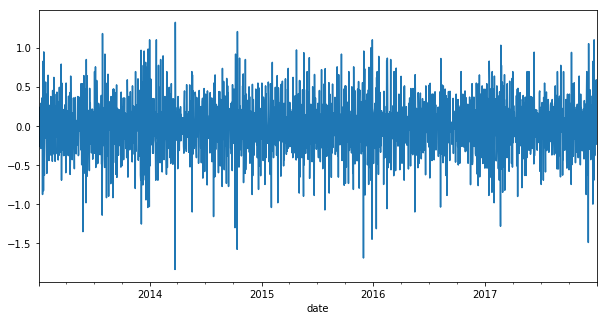

In [27]:
def generate():
    indexDataset["salesModLogDiff"] = indexDataset.salesModLog - indexDataset.salesModLog1
    indexDataset.salesModLogDiff.plot()
    return indexDataset
indexDataset = generate()
indexDataset.head()

From the above graph, we can see our data got stationary. 

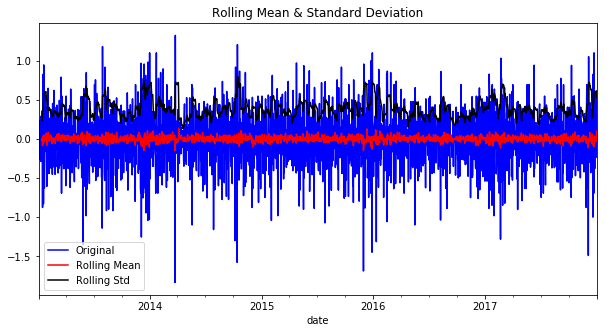

Results of Dickey Fuller Test:
Test Statistic                -1.259629e+01
p-value                        1.775858e-23
#Lags Used                     2.200000e+01
Number of Observations Used    1.802000e+03
Critical Value (1%)           -3.433984e+00
Critical Value (5%)           -2.863145e+00
Critical Value (10%)          -2.567625e+00
dtype: float64


In [28]:
def generate():
    test_stationarity(indexDataset.salesModLogDiff)
    return None
generate()

In [29]:
indexDataset.head()

sales  salesModLog  salesModLog1  salesModLogDiff
date                                                         
2013-01-02     11     2.397895      2.564949        -0.167054
2013-01-03     14     2.639057      2.397895         0.241162
2013-01-04     13     2.564949      2.639057        -0.074108
2013-01-05     10     2.302585      2.564949        -0.262364
2013-01-06     12     2.484907      2.302585         0.182322

In [30]:
indexDataset_ModLogDiff = indexDataset.drop(columns=["sales","salesModLog","salesModLog1"])

In [31]:
indexDataset_ModLogDiff.head()

salesModLogDiff
date                       
2013-01-02        -0.167054
2013-01-03         0.241162
2013-01-04        -0.074108
2013-01-05        -0.262364
2013-01-06         0.182322

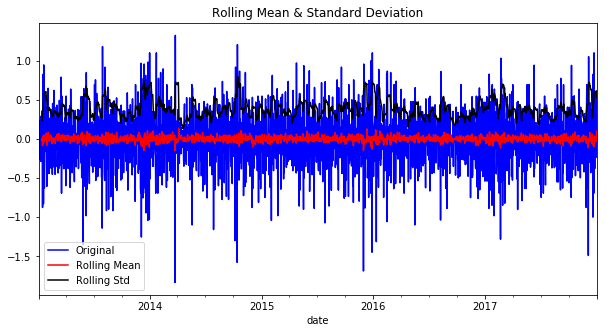

Results of Dickey Fuller Test:
Test Statistic                -1.259629e+01
p-value                        1.775858e-23
#Lags Used                     2.200000e+01
Number of Observations Used    1.802000e+03
Critical Value (1%)           -3.433984e+00
Critical Value (5%)           -2.863145e+00
Critical Value (10%)          -2.567625e+00
dtype: float64


In [32]:
def generate():
    test_stationarity(indexDataset_ModLogDiff.salesModLogDiff)
    return None
generate()

## 6. Plotting ACF & PACF 

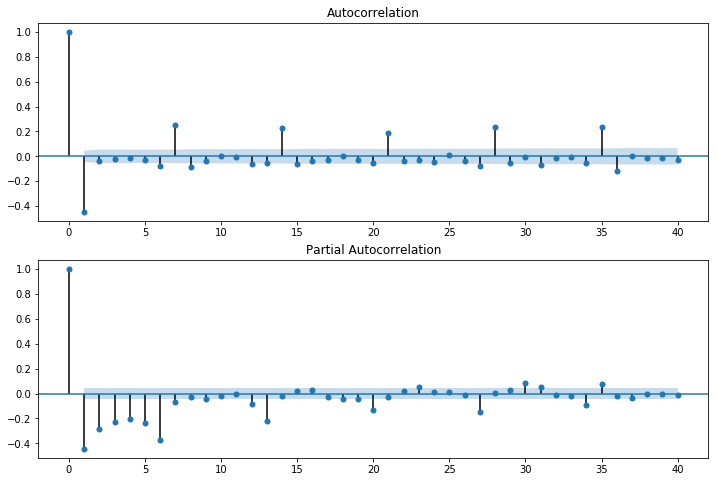

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(indexDataset_ModLogDiff.salesModLogDiff, lags=40, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = plot_pacf(indexDataset_ModLogDiff.salesModLogDiff, lags=40, ax=ax2)

## 7. ARIMA Model

In [34]:
# evaluate an ARIMA model for a given order (p,d,q)
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
def evaluate_arima_model(X, arima_order):
    model = ARIMA(X, order=arima_order)
    results_ARIMA = model.fit()
    aic = results_ARIMA.aic
    return aic

In [35]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    print(p,d,q)
                    aic = evaluate_arima_model(dataset, order)
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order,aic))
                except ValueError:
                    best_score, best_cfg = 9999, order
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
    return None

In [36]:
def generate():
    p_values = [0, 1, 2, 3, 4, 5, 6]
    d_values = [0,1]
    q_values = range(0, 2)
    evaluate_models(indexDataset_ModLogDiff.salesModLogDiff, p_values, d_values, q_values)
    return None
generate()

0 0 0
ARIMA(0, 0, 0) AIC=1707.233
0 0 1
ARIMA(0, 0, 1) AIC=712.268
0 1 0
ARIMA(0, 1, 0) AIC=3642.057
0 1 1
ARIMA(0, 1, 1) AIC=1716.809
1 0 0
ARIMA(1, 0, 0) AIC=1307.989
1 0 1
ARIMA(1, 0, 1) AIC=707.979
1 1 0
ARIMA(1, 1, 0) AIC=2674.424
1 1 1
2 0 0
ARIMA(2, 0, 0) AIC=1152.204
2 0 1
ARIMA(2, 0, 1) AIC=706.215
2 1 0
ARIMA(2, 1, 0) AIC=2227.298
2 1 1
3 0 0
ARIMA(3, 0, 0) AIC=1056.757
3 0 1
ARIMA(3, 0, 1) AIC=695.550
3 1 0
ARIMA(3, 1, 0) AIC=1966.840
3 1 1
4 0 0
ARIMA(4, 0, 0) AIC=980.438
4 0 1
ARIMA(4, 0, 1) AIC=679.732
4 1 0
ARIMA(4, 1, 0) AIC=1817.654
4 1 1
5 0 0
ARIMA(5, 0, 0) AIC=880.267
5 0 1
ARIMA(5, 0, 1) AIC=659.351
5 1 0
ARIMA(5, 1, 0) AIC=1759.871
5 1 1
6 0 0
ARIMA(6, 0, 0) AIC=609.712
6 0 1
ARIMA(6, 0, 1) AIC=601.196
6 1 0
ARIMA(6, 1, 0) AIC=1387.291
6 1 1
ARIMA(6, 1, 1) AIC=622.882
Best ARIMA(6, 0, 1) AIC=601.196


In [37]:
import statsmodels.api as sm

arima_mod6 = sm.tsa.ARIMA(indexDataset_ModLogDiff.salesModLogDiff, (6,0,1)).fit(disp=False)
print(arima_mod6.summary())

                              ARMA Model Results                              
Dep. Variable:        salesModLogDiff   No. Observations:                 1825
Model:                     ARMA(6, 1)   Log Likelihood                -291.598
Method:                       css-mle   S.D. of innovations              0.284
Date:                Sat, 06 Apr 2019   AIC                            601.196
Time:                        17:03:19   BIC                            650.780
Sample:                    01-02-2013   HQIC                           619.487
                         - 12-31-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0002      0.001      0.186      0.853      -0.002       0.003
ar.L1.salesModLogDiff    -0.6308      0.063    -10.028      0.000      -0.754      -0.507
ar.L2.sa

NormaltestResult(statistic=181.26174464091548, pvalue=4.360258738549053e-40)


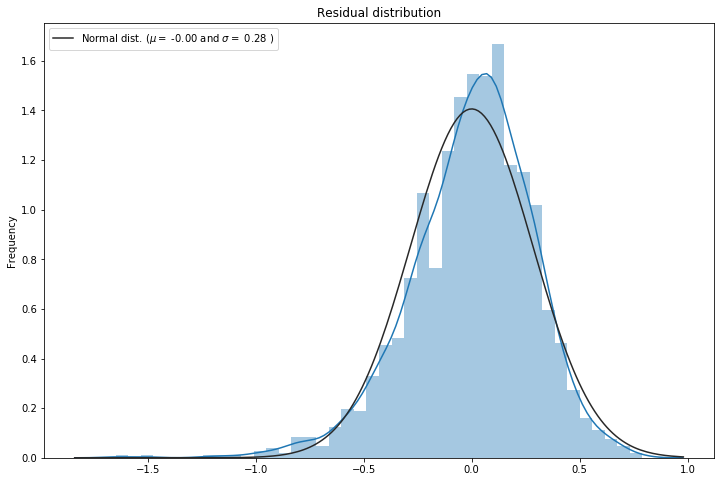

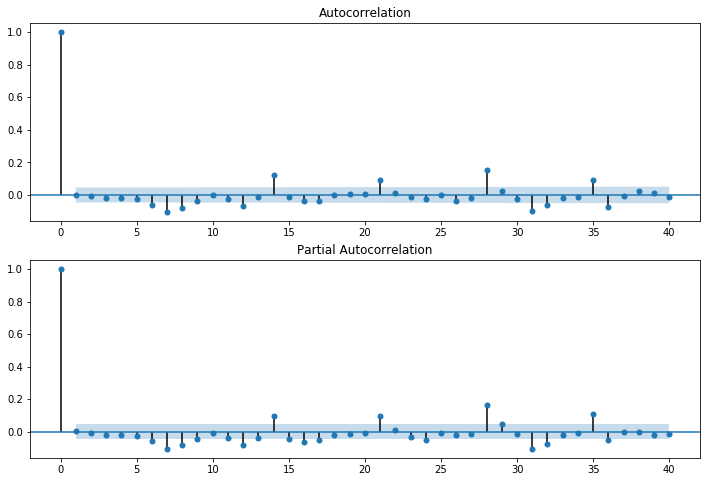

In [38]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_mod6.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

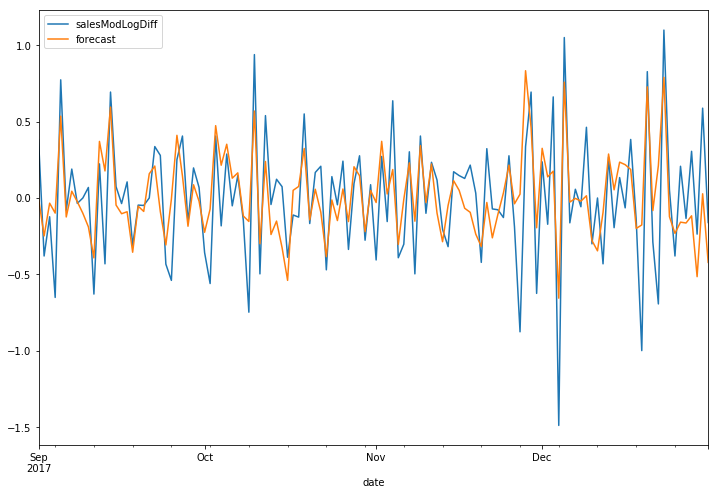

In [50]:
start_index = pd.to_datetime('2017-09-01')
end_index = pd.to_datetime('2018-01-01')
indexDataset_ModLogDiff['forecast'] = arima_mod6.predict(start = start_index, end= end_index, dynamic= False)  
indexDataset_ModLogDiff[start_index:end_index][['salesModLogDiff', 'forecast']].plot(figsize=(12, 8))

## 8. Conclusion

* We have used __Sales 1 : Items 1__ data for forecasting.
* Used __ARIMA model__ to predict best p, q, d values ie, ARIMA(6, 0, 1) AIC=601.196
* With the help of __ACF and PACF plotting__ monitored in __Autocorrelation graph__ and __Partial Autocorrelation graph__ at every 7 point we can see recurring pattern.